In [21]:
import yfinance as yf
import pandas as pd

# Download historical data for QQQ
ticker = "BTC-USD"
data = yf.download(ticker, start="2022-01-01", end="2024-07-31", interval="1d")

# Display the first few rows
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2022-01-01  46311.746094  47827.312500  46288.484375  47686.812500   
2022-01-02  47680.925781  47881.406250  46856.937500  47345.218750   
2022-01-03  47343.542969  47510.726562  45835.964844  46458.117188   
2022-01-04  46458.851562  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   

               Adj Close       Volume  
Date                                   
2022-01-01  47686.812500  24582667004  
2022-01-02  47345.218750  27951569547  
2022-01-03  46458.117188  33071628362  
2022-01-04  45897.574219  42494677905  
2022-01-05  43569.003906  36851084859  


In [22]:
from datetime import datetime

b = datetime(2022,12,28,23,55)
print(b)

2022-12-28 23:55:00


In [23]:
help(yf.download)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=False, back_adjust=False, repair=False, keepna=False, progress=True, period='max', interval='1d', prepost=False, proxy=None, rounding=False, timeout=10, session=None)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime, inclusive.
            Default is 99 years ago
            E.g. for start="2020-01-01", the first data point will be on "2020-01-01"
        end: str
            Downlo

In [24]:
# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

# Drop the NaN values
data = data.dropna()


In [25]:
# Calculate the standard deviation of daily returns
daily_volatility = data['Returns'].std()

# Annualize the daily volatility (assuming 252 trading days in a year)
annualized_volatility = daily_volatility * (252 ** 0.5)

print(f"Daily Volatility: {daily_volatility:.4f}")
print(f"Annualized Volatility: {annualized_volatility:.4f}")


Daily Volatility: 0.0285
Annualized Volatility: 0.4532


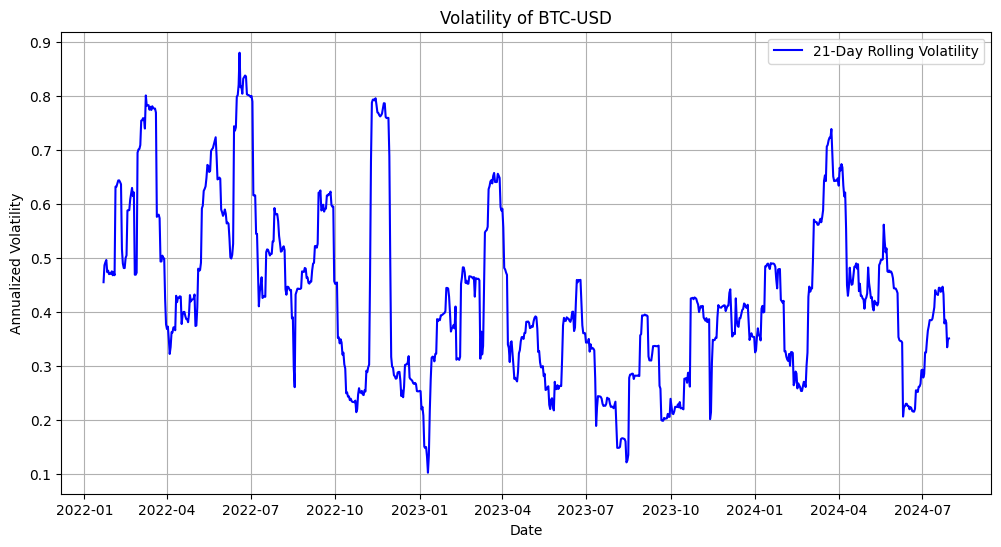

In [28]:
import matplotlib.pyplot as plt

# Calculate rolling volatility with a 21-day window
rolling_volatility = data['Returns'].rolling(window=21).std() * (252 ** 0.5)

# Plot the rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(data.index, rolling_volatility, label='21-Day Rolling Volatility', color='blue')
plt.title('Volatility of BTC-USD')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Download historical data for S&P 500
sp500 = yf.download("^GSPC", start="2022-01-01", end="2024-07-31", interval="1d")

# Calculate daily returns for S&P 500
sp500['Returns'] = sp500['Close'].pct_change()

# Calculate covariance between QQQ and S&P 500
covariance = data['Returns'].cov(sp500['Returns'])

# Calculate variance of S&P 500 returns
variance_sp500 = sp500['Returns'].var()

# Calculate beta
beta = covariance / variance_sp500

print(f"Beta of QQQ relative to S&P 500: {beta:.4f}")


[*********************100%%**********************]  1 of 1 completed

Beta of QQQ relative to S&P 500: 1.2892


In [6]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes call option price.

    :param S: Current stock price
    :param K: Strike price
    :param T: Time to expiration in years
    :param r: Risk-free interest rate
    :param sigma: Volatility
    :return: Call option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Example parameters
S = 370  # Current stock price
K = 380  # Strike price
T = 0.5  # Time to expiration in years
r = 0.02  # Risk-free interest rate
market_call_price = 15  # Market price of the call option

# Function to find implied volatility
from scipy.optimize import minimize

def objective_function(sigma):
    return (black_scholes_call(S, K, T, r, sigma) - market_call_price) ** 2

result = minimize(objective_function, 0.2, bounds=[(0.01, 2.0)])
implied_volatility = result.x[0]

print(f"Implied Volatility: {implied_volatility:.4f}")


Implied Volatility: 0.1705
